In [289]:
import pandas as pd
import seaborn as sns
#import matplotlib.pyplot as plt
import numpy as np
from matplotlib import pyplot as plt

%matplotlib inline

In [290]:
df = pd.read_csv('train.csv', parse_dates=True, index_col=0)

In [291]:
df

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
datetime,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...
2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168


In [292]:
df2=df.dropna()
df2

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
datetime,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...
2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168


ValueError: 'c' argument must be a mpl color, a sequence of mpl colors or a sequence of numbers, not                      count
datetime                  
2011-01-01 00:00:00     16
2011-01-01 01:00:00     40
2011-01-01 02:00:00     32
2011-01-01 03:00:00     13
2011-01-01 04:00:00      1
...                    ...
2012-12-19 19:00:00    336
2012-12-19 20:00:00    241
2012-12-19 21:00:00    168
2012-12-19 22:00:00    129
2012-12-19 23:00:00     88

[10886 rows x 1 columns].

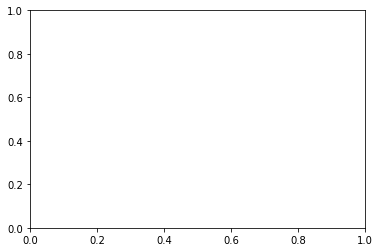

In [294]:
x = df2[['temp']]
z = df2[['season']]
y = df2[['count']]
plt.scatter(x['temp'], y, c=z )

<Figure size 864x576 with 0 Axes>

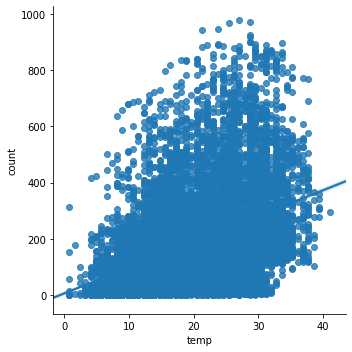

In [298]:
plt.figure(figsize=(12, 8))
sns.lmplot(x='temp', y='count', data=df2)

In [306]:
x = df2[['temp', 'season', 'atemp']]
y = df2[['count']]
xneu=x.set_index('temp')
yneu=y.set_index('count')

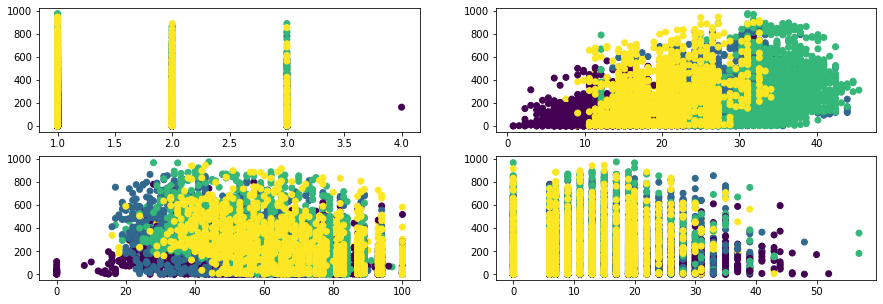

In [314]:
fig, ax = plt.subplots(2,2, figsize=(15, 5))
(ax1, ax2),(ax3, ax4)=ax
ax1.scatter(df2['weather'], y, c=x['season'])
ax2.scatter(df2['atemp'], y, c=x['season'])
ax3.scatter(df2['humidity'], y, c=x['season'])
ax4.scatter(df2['windspeed'], y, c=x['season'])

#plt.scatter(df2[['temp']], y )
#plt.plot(x, ytrain, 'bo')

In [315]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline, make_pipeline

pipeline = make_pipeline(
    PolynomialFeatures(degree=3),
    LinearRegression()
)

In [317]:
pipeline.fit(df2[['temp']], y)

Pipeline(memory=None,
         steps=[('polynomialfeatures',
                 PolynomialFeatures(degree=3, include_bias=True,
                                    interaction_only=False, order='C')),
                ('linearregression',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=False))],
         verbose=False)

In [318]:
pipeline.score(df2[['temp']], y)

0.15689098634250842

In [319]:
pipeline.fit(df2[['weather']], y)
pipeline.score(df2[['weather']], y)

0.01774510208855784

In [320]:
pipeline.fit(df2[['atemp']], y)
pipeline.score(df2[['atemp']], y)

0.153159405458704

In [321]:
pipeline.fit(df2[['humidity']], y)
pipeline.score(df2[['humidity']], y)

0.10535757671362933

In [322]:
pipeline.fit(df2[['windspeed']], y)
pipeline.score(df2[['windspeed']], y)

0.013746551665356986

In [323]:
pipeline.fit(df2[['workingday']], y)
pipeline.score(df2[['workingday']], y)

7.334902979228008e-05

In [341]:
df3 = df2.resample('D').agg({'workingday':max,'season':'mean','weather':'mean', 'temp':'mean', 'atemp':'mean', 'humidity':'mean', 'windspeed':'mean', 'casual':sum, 'registered': sum, 'count':sum})
#downsampled = df.resample('D').agg({'season':'mean', 'temp':sum})
df4=df3.dropna()
df4

,workingday,season,weather,temp,atemp,humidity,windspeed,casual,registered,count
datetime,,,,,,,,,,
2011-01-01,0.0,1.0,1.583333,14.110833,18.181250,80.583333,10.749871,331,654,985
2011-01-02,0.0,1.0,1.956522,14.902609,17.686957,69.608696,16.652122,131,670,801
2011-01-03,1.0,1.0,1.000000,8.050909,9.470227,43.727273,16.636709,120,1229,1349
2011-01-04,1.0,1.0,1.043478,8.200000,10.606087,59.043478,10.739809,108,1454,1562
2011-01-05,1.0,1.0,1.000000,9.305217,11.463478,43.695652,12.522300,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...
2012-12-15,0.0,4.0,1.375000,13.290833,16.919167,65.041667,7.125450,767,4280,5047
2012-12-16,0.0,4.0,2.041667,14.862500,18.496875,83.875000,6.749692,538,3248,3786
2012-12-17,1.0,4.0,2.125000,16.126667,20.075000,90.708333,6.583308,212,4373,4585


In [342]:
y = df4[['count']]
pipeline.fit(df4[['temp']], y)
pipeline.score(df4[['temp']], y)

0.42579930314710795

In [343]:
pipeline.fit(df4[['weather']], y)
pipeline.score(df4[['weather']], y)

0.11586654828384502

In [344]:
pipeline.fit(df4[['atemp']], y)
pipeline.score(df4[['atemp']], y)

0.41753876426403885

In [345]:
pipeline.fit(df4[['workingday']], y)
pipeline.score(df4[['workingday']], y)

0.0004355422120819741

In [347]:
df5 = df2[df2.season > 1] # df = df[df.tumorSizeMax > 1]
df5 = df5[df5.season < 4]
y = df5[['count']]
df5

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
datetime,,,,,,,,,,,
2011-04-01 00:00:00,2,0,1,3,10.66,12.880,100,11.0014,0,6,6
2011-04-01 01:00:00,2,0,1,3,10.66,12.880,100,11.0014,0,4,4
2011-04-01 02:00:00,2,0,1,3,10.66,12.880,93,12.9980,0,7,7
2011-04-01 03:00:00,2,0,1,2,9.84,11.365,93,16.9979,0,4,4
2011-04-01 04:00:00,2,0,1,2,9.84,11.365,93,16.9979,0,3,3
...,...,...,...,...,...,...,...,...,...,...,...
2012-09-19 19:00:00,3,0,1,1,22.96,26.515,43,15.0013,72,539,611
2012-09-19 20:00:00,3,0,1,1,21.32,25.000,48,11.0014,31,378,409
2012-09-19 21:00:00,3,0,1,1,20.50,24.240,59,11.0014,25,324,349


In [350]:
df6=df5.reset_index()
df6['new_time'] = [d.time() for d in df6['datetime']]
df6


#df5 = df2.resample('60min').agg({'workingday':max,'season':'mean','weather':'mean', 'temp':'mean', 'atemp':'mean', 'humidity':'mean', 'windspeed':'mean', 'casual':sum, 'registered': sum, 'count':sum})
#downsampled = df.resample('D').agg({'season':'mean', 'temp':sum})
#df6=df5.dropna()
#df6

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,new_time
0,2011-04-01 00:00:00,2,0,1,3,10.66,12.880,100,11.0014,0,6,6,00:00:00
1,2011-04-01 01:00:00,2,0,1,3,10.66,12.880,100,11.0014,0,4,4,01:00:00
2,2011-04-01 02:00:00,2,0,1,3,10.66,12.880,93,12.9980,0,7,7,02:00:00
3,2011-04-01 03:00:00,2,0,1,2,9.84,11.365,93,16.9979,0,4,4,03:00:00
4,2011-04-01 04:00:00,2,0,1,2,9.84,11.365,93,16.9979,0,3,3,04:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5461,2012-09-19 19:00:00,3,0,1,1,22.96,26.515,43,15.0013,72,539,611,19:00:00
5462,2012-09-19 20:00:00,3,0,1,1,21.32,25.000,48,11.0014,31,378,409,20:00:00
5463,2012-09-19 21:00:00,3,0,1,1,20.50,24.240,59,11.0014,25,324,349,21:00:00
5464,2012-09-19 22:00:00,3,0,1,1,20.50,24.240,63,6.0032,31,198,229,22:00:00


In [352]:
del df6['datetime']

In [353]:
df6

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,new_time
0,2,0,1,3,10.66,12.880,100,11.0014,0,6,6,00:00:00
1,2,0,1,3,10.66,12.880,100,11.0014,0,4,4,01:00:00
2,2,0,1,3,10.66,12.880,93,12.9980,0,7,7,02:00:00
3,2,0,1,2,9.84,11.365,93,16.9979,0,4,4,03:00:00
4,2,0,1,2,9.84,11.365,93,16.9979,0,3,3,04:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...
5461,3,0,1,1,22.96,26.515,43,15.0013,72,539,611,19:00:00
5462,3,0,1,1,21.32,25.000,48,11.0014,31,378,409,20:00:00
5463,3,0,1,1,20.50,24.240,59,11.0014,25,324,349,21:00:00
5464,3,0,1,1,20.50,24.240,63,6.0032,31,198,229,22:00:00


In [357]:
df7= df6[df6.workingday == 1]
df7
#df8 = df7.resample('60min').agg({'workingday':1,'season':'mean','weather':'mean', 'temp':'mean', 'atemp':'mean', 'humidity':'mean', 'windspeed':'mean', 'casual':sum, 'registered': sum, 'count':sum})
#df8

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,datetime
0,2,0,1,3,10.66,12.880,100,11.0014,0,6,6,00:00:00
1,2,0,1,3,10.66,12.880,100,11.0014,0,4,4,01:00:00
2,2,0,1,3,10.66,12.880,93,12.9980,0,7,7,02:00:00
3,2,0,1,2,9.84,11.365,93,16.9979,0,4,4,03:00:00
4,2,0,1,2,9.84,11.365,93,16.9979,0,3,3,04:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...
5461,3,0,1,1,22.96,26.515,43,15.0013,72,539,611,19:00:00
5462,3,0,1,1,21.32,25.000,48,11.0014,31,378,409,20:00:00
5463,3,0,1,1,20.50,24.240,59,11.0014,25,324,349,21:00:00
5464,3,0,1,1,20.50,24.240,63,6.0032,31,198,229,22:00:00


In [375]:
df8=df7.groupby(['datetime']).agg({'count':sum, 'weather':'mean', 'temp':'mean', 'atemp':'mean', 'humidity':'mean', 'windspeed':'mean'})

In [376]:
df8=df8.reset_index()
df8

,datetime,count,weather,temp,atemp,humidity,windspeed
0,00:00:00,6972,1.397436,24.426538,28.244263,69.032051,10.590123
1,01:00:00,3076,1.387097,24.033935,27.800839,70.703226,9.684094
2,02:00:00,1598,1.367742,23.631871,27.336516,72.619355,9.580957
3,03:00:00,861,1.385621,23.361961,26.990654,73.973856,10.235717
4,04:00:00,933,1.406452,23.028774,26.652161,75.845161,10.522761
5,05:00:00,4377,1.397436,22.765513,26.364840,76.365385,10.045190
6,06:00:00,18573,1.435897,22.818077,26.350417,76.301282,10.474720
7,07:00:00,52462,1.525641,23.496154,27.069103,73.230769,10.929676
8,08:00:00,80903,1.506410,24.342436,28.020833,68.923077,12.699034
9,09:00:00,40096,1.519231,25.362179,29.152500,64.089744,13.346228


In [386]:
df8=df8.reset_index()
#x = df8[['datetime','temp', 'humidity', 'windspeed']]
#y = df8[['count']]
plt.scatter(df8[['datetime']], y )

In [387]:
df8

,index,datetime,count,weather,temp,atemp,humidity,windspeed
0,0,00:00:00,6972,1.397436,24.426538,28.244263,69.032051,10.590123
1,1,01:00:00,3076,1.387097,24.033935,27.800839,70.703226,9.684094
2,2,02:00:00,1598,1.367742,23.631871,27.336516,72.619355,9.580957
3,3,03:00:00,861,1.385621,23.361961,26.990654,73.973856,10.235717
4,4,04:00:00,933,1.406452,23.028774,26.652161,75.845161,10.522761
5,5,05:00:00,4377,1.397436,22.765513,26.364840,76.365385,10.045190
6,6,06:00:00,18573,1.435897,22.818077,26.350417,76.301282,10.474720
7,7,07:00:00,52462,1.525641,23.496154,27.069103,73.230769,10.929676
8,8,08:00:00,80903,1.506410,24.342436,28.020833,68.923077,12.699034
9,9,09:00:00,40096,1.519231,25.362179,29.152500,64.089744,13.346228


In [388]:
df8.rename(columns = {'index':'hour'}, inplace = True)
df8

,hour,datetime,count,weather,temp,atemp,humidity,windspeed
0,0,00:00:00,6972,1.397436,24.426538,28.244263,69.032051,10.590123
1,1,01:00:00,3076,1.387097,24.033935,27.800839,70.703226,9.684094
2,2,02:00:00,1598,1.367742,23.631871,27.336516,72.619355,9.580957
3,3,03:00:00,861,1.385621,23.361961,26.990654,73.973856,10.235717
4,4,04:00:00,933,1.406452,23.028774,26.652161,75.845161,10.522761
5,5,05:00:00,4377,1.397436,22.765513,26.364840,76.365385,10.045190
6,6,06:00:00,18573,1.435897,22.818077,26.350417,76.301282,10.474720
7,7,07:00:00,52462,1.525641,23.496154,27.069103,73.230769,10.929676
8,8,08:00:00,80903,1.506410,24.342436,28.020833,68.923077,12.699034
9,9,09:00:00,40096,1.519231,25.362179,29.152500,64.089744,13.346228


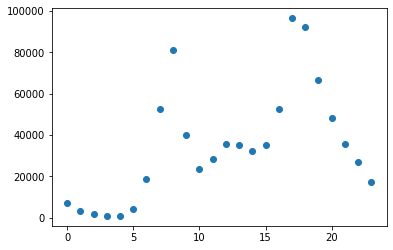

In [389]:
x = df8[['hour','temp', 'humidity', 'windspeed']]
y = df8[['count']]
plt.scatter(df8[['hour']], y )

In [390]:
pipeline.fit(x, y)

Pipeline(memory=None,
         steps=[('polynomialfeatures',
                 PolynomialFeatures(degree=3, include_bias=True,
                                    interaction_only=False, order='C')),
                ('linearregression',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=False))],
         verbose=False)

In [391]:
pipeline.score(x, y)

1.0

In [392]:
x

,hour,temp,humidity,windspeed
0,0,24.426538,69.032051,10.590123
1,1,24.033935,70.703226,9.684094
2,2,23.631871,72.619355,9.580957
3,3,23.361961,73.973856,10.235717
4,4,23.028774,75.845161,10.522761
5,5,22.765513,76.365385,10.045190
6,6,22.818077,76.301282,10.474720
7,7,23.496154,73.230769,10.929676
8,8,24.342436,68.923077,12.699034
9,9,25.362179,64.089744,13.346228


In [393]:
pipeline.fit(df8[['hour']], y)
pipeline.score(df8[['hour']], y)

0.5119795659088293

In [394]:
pipeline.fit(df8[['temp']], y)
pipeline.score(df8[['temp']], y)

0.34034741270789426

In [395]:
pipeline.fit(df8[['humidity']], y)
pipeline.score(df8[['humidity']], y)

0.3435112980359867

In [396]:
pipeline.fit(df8[['windspeed']], y)
pipeline.score(df8[['windspeed']], y)

0.5992829545952914

In [397]:
pipeline.fit(df8[['hour', 'temp']], y)
pipeline.score(df8[['hour', 'temp']], y)

0.8675342100963511

In [398]:
pipeline.fit(df8[['hour', 'temp', 'humidity']], y)
pipeline.score(df8[['hour', 'temp', 'humidity']], y)

0.9544350779680008

In [400]:
polynomial_features = PolynomialFeatures(degree=3, include_bias=False)
features = polynomial_features.fit_transform(df8[['hour', 'temp', 'humidity']])

In [401]:
exog_features = sm.add_constant(features)
model = sm.OLS(y, exog_features)
results = model.fit()

NameError: name 'sm' is not defined